---

# **Credit Score Prediction**

## **Author** : *Refat Pasha*

----



<br>

### **Steps Involved in This Notebook Inculde**

- **Data Prparation**
- **Data Analysis**
- **Statical Analysis**
- **Feature Engineering**
- **Model Training**
- **Model Evaluation**
- **Saving Best Model**

----

### **Import Libraries**

----

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# to perform statistical test
from sklearn.feature_selection import chi2 # for categorical fetures
from sklearn.feature_selection import f_classif # for numerical features (Anova f-test)

# impot pipeline
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

----

### **Load the dataset**

----

In [2]:
df = pd.read_csv('Credit_Score_Clean.csv')

----

### **First 5 rows of Dataset**

----

In [3]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,5,4,6.27,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
1,23,Scientist,19114.12,3,4,3,4,6,0,11.27,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
2,23,Scientist,19114.12,3,4,3,4,3,8,11.27,...,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271
3,23,Scientist,19114.12,3,4,3,4,3,6,11.27,...,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,0
4,28,Teacher,34847.84,2,4,6,1,7,1,7.42,...,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320


----

### **Shape of dataset**

----

In [4]:
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 31711 rows and 21 columns


----

### **Check Numerical Features**

----

In [5]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical Features:", numerical_features)

Numerical Features: ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age_Months']


----

### **Check Catagorical Features**

----

In [6]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

Categorical Features: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


----

### **Check Details of Dataset**

----

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31711 entries, 0 to 31710
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        31711 non-null  int64  
 1   Occupation                 31711 non-null  object 
 2   Annual_Income              31711 non-null  float64
 3   Num_Bank_Accounts          31711 non-null  int64  
 4   Num_Credit_Card            31711 non-null  int64  
 5   Interest_Rate              31711 non-null  int64  
 6   Num_of_Loan                31711 non-null  int64  
 7   Delay_from_due_date        31711 non-null  int64  
 8   Num_of_Delayed_Payment     31711 non-null  int64  
 9   Changed_Credit_Limit       31711 non-null  float64
 10  Num_Credit_Inquiries       31711 non-null  float64
 11  Credit_Mix                 31711 non-null  object 
 12  Outstanding_Debt           31711 non-null  float64
 13  Credit_Utilization_Ratio   31711 non-null  flo


----

### **Check for missing Values**

----


In [8]:
df.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

----

### **Let's see statistical description of dataset**

----

In [9]:
df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months
count,31711.000000,3.171100e+04,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000
mean,35.135032,1.749045e+05,4.415818,4.801583,10.256504,2.234114,14.985967,26.493299,8.601820,3.903030,776.983756,32.522218,59.287714,181.502288,439.647331,243.861026
std,11.037186,1.415577e+06,2.305062,1.673844,5.916633,1.700965,9.353937,215.388313,5.119076,2.813889,443.968460,5.135545,53.461204,196.253121,225.424866,108.853693
min,14.000000,7.006520e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.832487,0.000000,0.000000,0.000000,0.000000
25%,26.000000,2.211810e+04,3.000000,4.000000,6.000000,1.000000,8.000000,6.000000,4.550000,2.000000,388.920000,28.299138,16.414812,61.938256,293.841559,195.000000
50%,35.000000,3.699394e+04,4.000000,5.000000,9.000000,2.000000,13.000000,11.000000,8.370000,4.000000,780.210000,32.501616,46.162077,121.191802,369.698223,256.000000
75%,44.000000,7.452061e+04,6.000000,6.000000,14.000000,3.000000,22.000000,15.000000,11.620000,6.000000,1182.500000,36.731398,89.163419,225.891543,523.103061,329.000000
max,56.000000,2.419806e+07,10.000000,10.000000,34.000000,9.000000,60.000000,4397.000000,26.900000,12.000000,1499.920000,49.564519,199.904691,1903.080048,1602.040519,404.000000


----

### **Let's Explore catagorical Columns**

----

In [10]:
df['Occupation'].unique()

array(['Scientist', 'Teacher', 'Entrepreneur', 'Developer', 'Lawyer',
       'Journalist', 'Engineer', 'Accountant', 'Musician', 'Architect',
       'Writer', 'Manager', 'Media_Manager', 'Doctor', 'Mechanic'],
      dtype=object)

----

### **Plot occupation using pie chart**

----

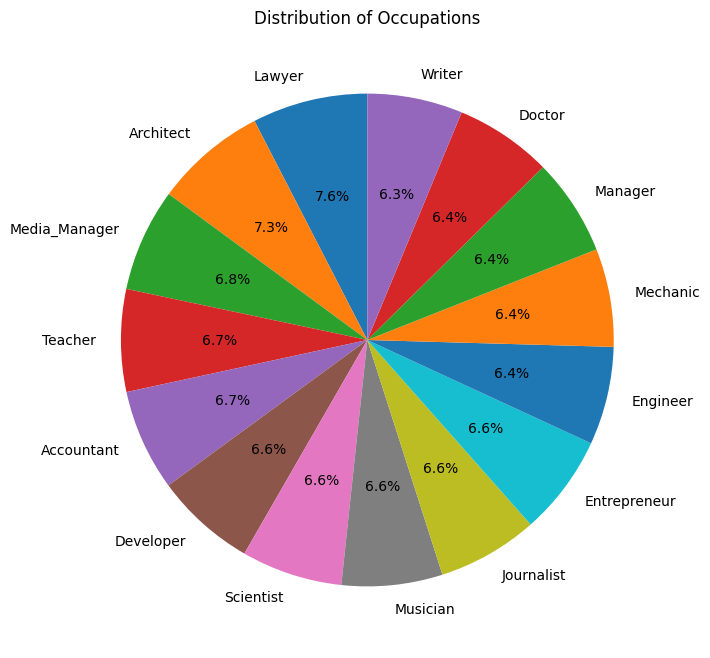

In [11]:
# Plot occupation using pie chart
occupation_counts = df['Occupation'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Occupations')
plt.show()


In [12]:
# 'Credit_Mix'

df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [13]:
# Payment_of_Min_Amount

df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [14]:
# Payment_Behaviour

df['Payment_Behaviour'].unique()

array(['Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Large_value_payments',
       'High_spent_Small_value_payments'], dtype=object)

In [15]:
# Credit_Score

df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [16]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    19730
Good         7551
Poor         4430
Name: count, dtype: int64

----

### **Feature Engineering**

----

In [17]:
# prompt: i want to make a binary classification as this is my target column

# Create a new column 'Credit_Score' with 1 for 'Good' and 'Standard' and 0 for 'Poor'
df['Credit_Score'] = df['Credit_Score'].apply(lambda x: 1 if x in ['Good', 'Standard'] else 0)

# Now you have a binary classification target variable
print(df['Credit_Score'].value_counts())


Credit_Score
1    27281
0     4430
Name: count, dtype: int64


In [18]:
df.sample(5)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
6148,28,Doctor,13913.795,7,4,11,3,25,15,0.00,...,Standard,1470.31,37.080114,Yes,24.636451,57.069533,Low_spent_Large_value_payments,303.942308,1,206
3949,29,Writer,20000.410,2,5,5,1,12,2,1.48,...,Good,446.57,35.765910,No,10.975637,72.383708,Low_spent_Large_value_payments,376.110739,0,330
13803,43,Doctor,56366.580,5,3,20,2,11,17,19.93,...,Standard,327.80,26.500781,Yes,65.360058,232.099787,Low_spent_Medium_value_payments,472.261656,1,281
6828,16,Writer,19980.360,4,3,6,3,30,0,19.44,...,Standard,1477.83,27.910168,Yes,25.805439,184.117462,Low_spent_Small_value_payments,230.680099,1,262
31020,15,Accountant,31767.330,5,3,19,0,21,18,13.84,...,Standard,969.19,30.540187,Yes,0.000000,30.029575,High_spent_Medium_value_payments,490.898175,1,393


----

### **Statistical Test**

----

In [19]:
# Chi-Squared Test

categorical_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

In [20]:
# Label encode each categorical column
label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

In [21]:
# Define X1 (independent variables) and y1 (target)
X1 = df[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']]
y1 = df['Credit_Score']

In [22]:
# Perform Chi-Square test
chi_scores = chi2(X1, y1)
chi2_scores = pd.DataFrame({"Feature": X1.columns, "Score": chi_scores[0]})
print(chi2_scores.sort_values(by="Score", ascending=False))

                 Feature       Score
1             Credit_Mix  288.745515
3      Payment_Behaviour  127.452384
0             Occupation    4.753546
2  Payment_of_Min_Amount    0.001643


In [23]:
# Defining the target column
y_for_f_test = df['Credit_Score']

In [24]:
# Performing the ANOVA F-test
f_scores, p_values = f_classif(X_num_for_f_test, y_for_f_test)

NameError: name 'X_num_for_f_test' is not defined

In [ ]:
# Creating a DataFrame to store F-scores
f_scores_df = pd.DataFrame({'Feature': X_num_for_f_test.columns, 'F-Score': f_scores})

In [ ]:
# Sorting and displaying the F-scores
print(f_scores_df.sort_values(by='F-Score', ascending=False))

                      Feature      F-Score
6         Delay_from_due_date  1290.385124
3             Num_Credit_Card  1030.110256
9        Num_Credit_Inquiries   585.906436
4               Interest_Rate   453.047239
10           Outstanding_Debt   451.549924
5                 Num_of_Loan   274.356620
15  Credit_History_Age_Months    92.515418
12        Total_EMI_per_month    28.425328
8        Changed_Credit_Limit    27.130593
13    Amount_invested_monthly    20.350875
0                         Age    11.370137
2           Num_Bank_Accounts     6.047901
11   Credit_Utilization_Ratio     2.873588
7      Num_of_Delayed_Payment     2.290066
1               Annual_Income     0.064910
14            Monthly_Balance     0.030461


In [ ]:
# List of selected features (from the above chi-squared and F-test results)
selected_features = [
    'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
    'Delay_from_due_date', 'Interest_Rate', 'Num_Credit_Card',
    'Num_Bank_Accounts', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Num_of_Loan', 'Outstanding_Debt', 'Occupation'
]

----

### **Model Training**

----

In [ ]:
# Define X (independent variables) and y (target variable)
X = df[selected_features]
y = df['Credit_Score']  # Assuming 'loan_eligibility' is the target

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    pipeline.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test_scaled)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.9124490518834942
Test Accuracy: 0.9132902412107835

Model: Gradient Boosting
Cross-validation Accuracy: 0.8893094676609946
Test Accuracy: 0.8948447107047138

Model: Support Vector Machine
Cross-validation Accuracy: 0.8595474693829569
Test Accuracy: 0.8918492826738137

Model: Logistic Regression
Cross-validation Accuracy: 0.8729108581909483
Test Accuracy: 0.8795522623364339

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.8879298621676538
Test Accuracy: 0.8909033580324768

Model: Decision Tree
Cross-validation Accuracy: 0.8696783601126354
Test Accuracy: 0.8749802932366388

Model: Ada Boost
Cross-validation Accuracy: 0.8789814393730137
Test Accuracy: 0.8847548478637869

Model: XG Boost
Cross-validation Accuracy: 0.9020421825579881
Test Accuracy: 0.9052498817594198

Model: Naive Bayes
Cross-validation Accuracy: 0.8749211686748326
Test Accuracy: 0.8781333753744285

Best Model: Pipeline(steps=[('model', RandomForestClassifier(random_

----

### **Model Evaluation**

----

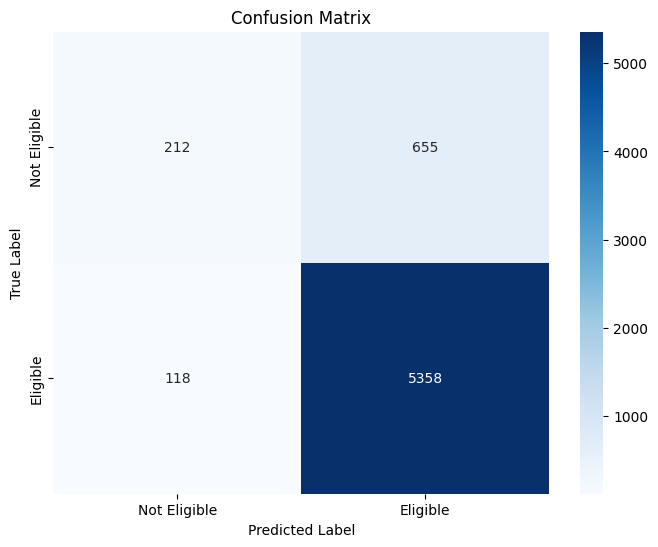

In [ ]:
# prompt: draw a confusion matrix of my models results

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_pred' contains the predictions from your best model
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Eligible', 'Eligible'],
            yticklabels=['Not Eligible', 'Eligible'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


----

### **Saving Best Model**

----

In [ ]:
import pickle
pickle.dump(best_model, open('01_credit_scoring_model.pkl', 'wb'))

----

### **Making Prediction With Saved Model**

----

In [ ]:
# Sample data for prediction where the model predicts the user should be given a loan
sample_data = pd.DataFrame({
    'Credit_Mix': [2],
    'Payment_of_Min_Amount': [1],
    'Payment_Behaviour': [0],
    'Delay_from_due_date': [10],
    'Interest_Rate': [10.5],
    'Num_Credit_Card': [3],
    'Num_Bank_Accounts': [5],
    'Changed_Credit_Limit': [1],
    'Num_Credit_Inquiries': [2],
    'Num_of_Loan': [2],
    'Outstanding_Debt': [5000],
    'Occupation': [2]
})

# Make prediction
prediction = loaded_model.predict(sample_data)

if prediction[0] == 1:
  print("User should be given a loan.")
else:
  print("User should not be given a loan.")


User should not be given a loan.
